## CNN Notebook

The whole idea behind a "neural network" is to imitate how humans learn. So how do humans learn?

A neurons collects signals from input channels named "dendrites," processes information in its nucleus, and then generates an output in a long thin branch called an axon. Humans learn as they change the strength of the bonds between neurons. A neural network is an attempt to represent this all mathematically.

We can represent the biological nucleus of a neuron as a summation. We can think of the summation as the total of all of the inputs (training data) multiplied by "weights" -- essentially representing the strength of the bonds between neurons in a human brain. Simply stated, larger sums equate to stronger bonds. Traditional neural networks also include a bias term that can shift the summation value up or down. The summation is then filtered through what is called an activation function (common ones include sigmoid (binary classification), softmax (multi-class classification), relu, etc). This activation function is kind of the crux of deep learning; without it, the weights and bias would simply do a linear transformation (essentially just a linear regression model). The activation function allows the network to learn complex non-linear patterns. Understanding which activation function to use is a critical step in designing any neural network.

Imagine taking thousands of these "artifical neurons" connected together. This is a neural network in something called a "hidden layer." The hidden layer is connected to an output layer which tells the network what it should predict for a given set of inputs.

Let's talk a little bit more about the inputs. How could a neural netowrk take for example an image and generate a prediction for the type of article of clothing in the image? You cannot just take an image and feed it directly to a network in the same way you could hold up a picture to a human person. The pipeline from image to network input requires some legwork and goes something like this: take an image, say for example of a shoe. The shoe image undergoes a process called "convolution" (to be defined later), "pooling" (essentially downsampling), and "flattening" before it is ready to be fed into a CNN as an input. 

#### Feature Detector

Convolutions use a kernel matrix to scan a given image and apply a filter to obtain a certain effect

An image kernel is a matrix used to apply effects such as blurring and sharpening. They are used in ML for feature extraction to select the _most important_ pixels of an image. Convolutions preserve the spatial relationship between pixels.

feature maps: outputs of convolution (the process of running a feature detector on an actual image)

The feature map will be the same size as the feature detector, the feature map will be a new version of the image over which the feature detector was applied. The feature map might be a blurred version, a sharpened version, etc depending on the values in the feature detector used to multiply the pixel values in your image. 

#### Pooling (downsampling layer)

Helps avoid overfitting by reducing feature map dimensionality. This improves computational efficiency while preserving the features. Max pooling works by returning the maximum feature response within a given sample size in a feature map. (Min, avg pooling etc also exist). This allows us to move from say 40x40 to 20x20. We keep the prominent features but represent it in a much more condensed form.

#### Flattening

Converts a 2x2 for example into a vector that can be used as an input to a CNN!

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

training = np.array(train, dtype = 'float32')
testing = np.array(test, dtype = 'float32')

In [109]:
training.shape

(60000, 785)

3.0

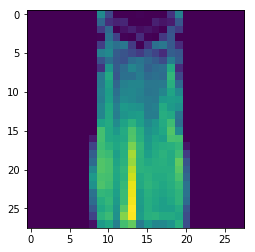

In [110]:
import random

i = random.randint(1,60000)
plt.imshow(training[i, 1:].reshape(28,28))
label = training[i, 0]
label

In [111]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Training the model

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

In [114]:
X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [115]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = .2, random_state = 12345)

In [116]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [117]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [118]:
cnn_model = Sequential()

In [119]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))

/Users/jj5jxt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [120]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [121]:
cnn_model.add(Flatten())

In [122]:
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

/Users/jj5jxt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [123]:
cnn_model.add(Dense(output_dim = 10, activation = 'softmax'))

/Users/jj5jxt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  """Entry point for launching an IPython kernel.


In [124]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [125]:
epochs = 50

In [ ]:
cnn_model.fit(X_train, y_train,
             batch_size = 512,
             nb_epoch = epochs,
             verbose = 1, 
             validation_data = (X_validate, y_validate))

/Users/jj5jxt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 95us/step - loss: 0.7963 - acc: 0.7381 - val_loss: 0.4930 - val_acc: 0.8293
Epoch 2/50
48000/48000 [==============================] - 4s 91us/step - loss: 0.4420 - acc: 0.8469 - val_loss: 0.4069 - val_acc: 0.8577
Epoch 3/50
48000/48000 [==============================] - 4s 91us/step - loss: 0.3858 - acc: 0.8638 - val_loss: 0.3734 - val_acc: 0.8710
Epoch 4/50
48000/48000 [==============================] - 4s 92us/step - loss: 0.3538 - acc: 0.8767 - val_loss: 0.3423 - val_acc: 0.8842
Epoch 5/50
48000/48000 [==============================] - 4s 90us/step - loss: 0.3292 - acc: 0.8860 - val_loss: 0.3245 - val_acc: 0.8848
Epoch 6/50
48000/48000 [==============================] - 4s 91us/step - loss: 0.3137 - acc: 0.8912 - val_loss: 0.3209 - val_acc: 0.8869
Epoch 7/50
48000/48000 [==============================] - 4s 91us/step - loss: 0.2985 - acc: 0.8964 - val_loss: 0.3084 - val_acc

#### Evaluating the Model

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
evaluation[1]

The key point is during training we reached about 95% accuracy. During testing we receive 91% accuracy. 

In [ ]:
predict_classes = cnn_model.predict_classes(X_test)
predict_classes

Let's print a grid that will tell us here is the image with the predicted and actual labels.

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predict_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)


Gives an overview of how many classes have been classified correctly vs incorrectly

In [ ]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predict_classes, target_names = target_names))

Precision and recall are interesting concepts. My preferred way to remember which is which is with this story:

Suppose you are in a room with a giant bowl full of skittles, regular m&m's, and peanut m&m's. Also suppose you have a nephew coming over who loves candy but who also is highly allergic to peanuts. You decide to build a model that can classify whether or not a given sample (or candy) is a skittle, an m&m, or a peanut m&m. 

Precision is a measure of how often the model is correct when it predicts the positive class. That is, of the times the model said "that's a peanut!", how many of those times was it actually a peanut m&m. 

Recall is a measure of _comprehensiveness_. That is, of the peanut m&m's in the bowl, how many did the model identify? A naive model could in theory say "that's a peanut" on every sample. In that case the boy-who-cried-wolfness of the model would skyrocket, but you could be sure that you would find all of the peanut m&m's. This wouldn't be super useful if you were trying to give your nephew some peanut m&ms.

A good data scientist can leverage precision and recall scores to find a model that doesn't "cheat." That is, if I try to optimize only for high precision, my model will get more conservative and my recall score will fall. If I try to optimize only for high recall, my model will devolve into a boy-who-cried-peanut and the precision score will plummet. By taking both metrics into account we obtain the f1 score, which is the harmonic mean of precision and recall. In certain cases recall can be weighted more heavily than precision or vice-versa, which may or may not make sense depending on your use case. 



#### Improving the model.

Adding dropout (regularization to avoid overfitting); expanding the size of the kernel from 32 to maybe 64; 

Dropout will typically decrease the training accuracy but marginally increase the testing accuracy. Feature engineering for texture, fabric, shape, and style variables, length, color.